In [1]:
%pip uninstall scikit-learn imbalanced-learn -y
%pip install scikit-learn==1.5.2
%pip install imbalanced-learn --upgrade
%pip install tensorflow


Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2
Found existing installation: imbalanced-learn 0.14.0
Uninstalling imbalanced-learn-0.14.0:
  Successfully uninstalled imbalanced-learn-0.14.0
Note: you may need to restart the kernel to use updated packages.
  Using cached scikit_learn-1.5.2-cp312-cp312-macosx_12_0_arm64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-macosx_12_0_arm64.whl (11.0 MB)
Note: you may need to restart the kernel to use updated packages.
  Using cached imbalanced_learn-0.14.0-py3-none-any.whl.metadata (8.8 kB)
Using cached imbalanced_learn-0.14.0-py3-none-any.whl (239 kB)
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
!conda run -n tf-env pip install --upgrade pip
!conda run -n tf-env pip install tensorflow
!conda run -n tf-env pip install protobuf==3.20.3
!conda run -n tf-env python -m ipykernel install --user --name tf-env --display-name "Python (tf-env)"



  Using cached protobuf-6.33.0-cp39-abi3-macosx_10_9_universal2.whl.metadata (593 bytes)
Using cached protobuf-6.33.0-cp39-abi3-macosx_10_9_universal2.whl (427 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3

  Using cached protobuf-3.20.3-py2.py3-none-any.whl.metadata (720 bytes)
Using cached protobuf-3.20.3-py2.py3-none-any.whl (162 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.33.0
    Uninstalling protobuf-6.33.0:
      Successfully uninstalled protobuf-6.33.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.20.0 requires protobuf>=5.28.0, but you have protobuf 3.20.3 which is incompatible.

/opt/anaconda3/envs/tf-env/bin/python: No module named ipykernel

ERROR conda.cli.main_run:execute(125

In [3]:
import pandas as pd  # Import Pandas for data manipulation and analysis
import numpy as np  # Import NumPy for numerical operations
import matplotlib.pyplot as plt  # Import Matplotlib for data visualization
import seaborn as sns  # Import Seaborn for statistical data visualization

from sklearn.model_selection import train_test_split  # Utility to split data into training and test sets
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Tools for encoding labels and scaling features
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score, roc_auc_score, classification_report,
                             confusion_matrix, roc_curve, auc)  # Metrics for evaluating models

from sklearn.linear_model import LogisticRegression  # Import Logistic Regression algorithm
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest Classifier
from sklearn.model_selection import learning_curve  # Tool to generate learning curves
from imblearn.over_sampling import SMOTE  # SMOTE for handling imbalanced datasets by oversampling minority class
from collections import Counter  # Counter for counting elements, often used to inspect class distribution
import warnings  # Import warnings to manage warning messages
warnings.filterwarnings("ignore")  # Suppress warnings to keep the output clean


In [4]:
df = pd.read_csv("diabetes_prediction_dataset.csv")


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
print("Shape:", df.shape)


Shape: (100000, 9)


In [7]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [8]:
df.sample(15)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
32336,Female,80.0,0,0,never,25.39,4.0,160,0
23787,Male,28.0,0,0,never,26.52,5.0,160,0
40555,Male,56.0,0,0,ever,31.75,5.7,90,0
77560,Male,48.0,0,0,never,20.66,4.8,90,0
825,Male,69.0,1,0,never,44.50,6.2,145,0
99968,Female,51.0,0,0,never,21.49,6.2,155,0
40079,Female,34.0,0,0,former,20.09,6.6,126,0
68249,Male,80.0,0,0,ever,27.32,4.5,160,0
8063,Male,50.0,0,0,current,27.32,5.0,90,0
5811,Male,25.0,0,0,former,22.68,6.0,200,0


In [9]:
df.isnull().sum()
#df.isnull(): This checks every cell in the DataFrame df and returns a new DataFrame of the same shape, filled with True wherever the value is missing (NaN) and False elsewhere.

#.sum(): When you apply .sum() to the result, Pandas adds up all the True values in each column. Since True counts as 1 and False as 0, you end up with a count of how many missing values are in each column.

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [10]:
df.nunique() #This calculates the number of unique values in each column of the DataFrame df

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [11]:
df = df.drop_duplicates()

cat_cols = ['gender', 'smoking_history']
for col in cat_cols:
    df[col] = df[col].astype('category')

In [12]:
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


In [13]:
df.shape


(96146, 9)

In [14]:
df.dtypes

gender                 category
age                     float64
hypertension              int64
heart_disease             int64
smoking_history        category
bmi                     float64
HbA1c_level             float64
blood_glucose_level       int64
diabetes                  int64
dtype: object

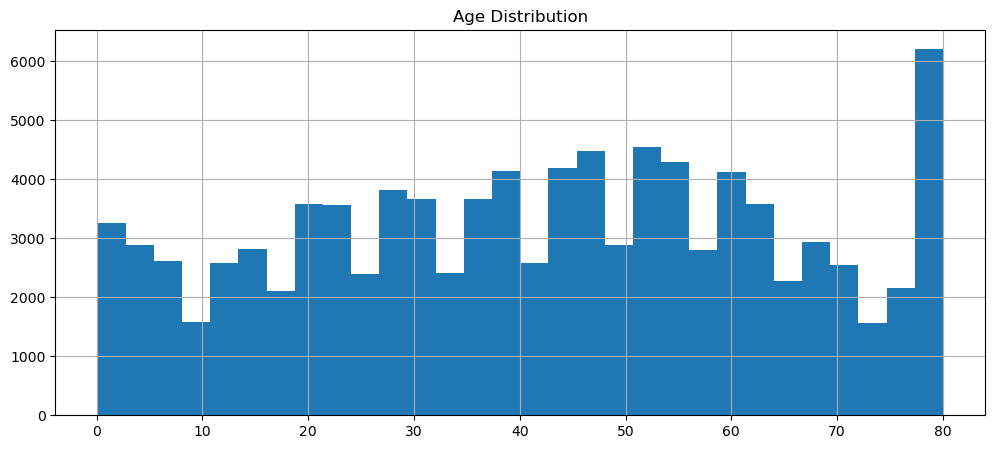

In [15]:
plt.figure(figsize=(12,5))
df['age'].hist(bins=30)
plt.title("Age Distribution")
plt.show()


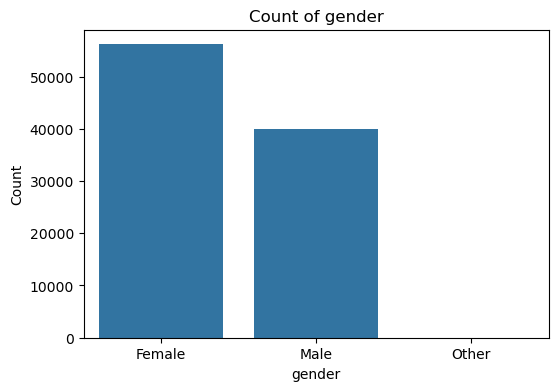

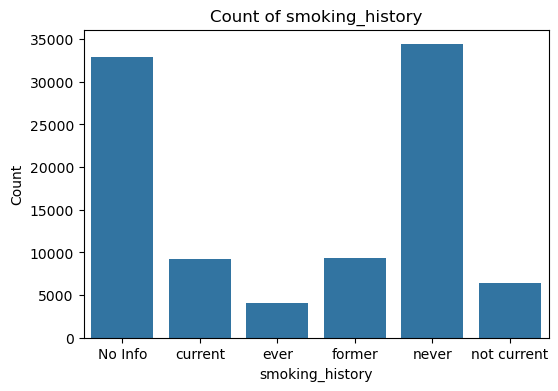

In [16]:
categorical_cols = df.select_dtypes(include=["object", "category"]).columns
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

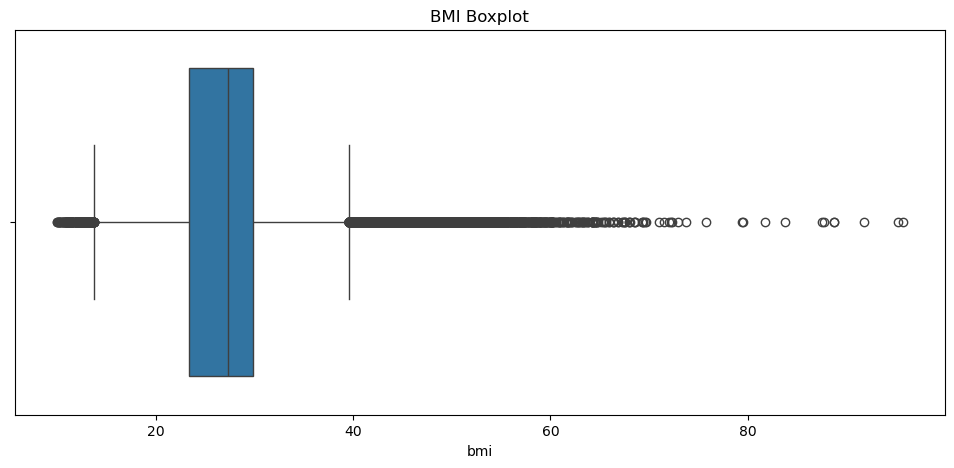

In [17]:
plt.figure(figsize=(12,5))      # Create a new figure with a custom size of 12 inches wide and 5 inches tall
sns.boxplot(x=df['bmi'])         # Plot a boxplot of the 'bmi' column from the DataFrame using Seaborn
plt.title("BMI Boxplot")         # Set the title of the plot
plt.show()                       # Display the plot


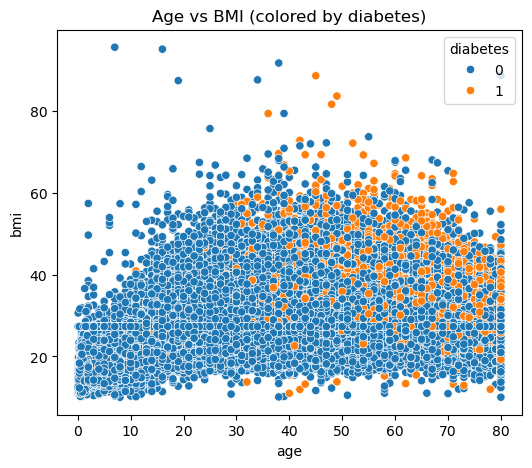

In [18]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='age', y='bmi', hue='diabetes')
plt.title("Age vs BMI (colored by diabetes)")
plt.show()


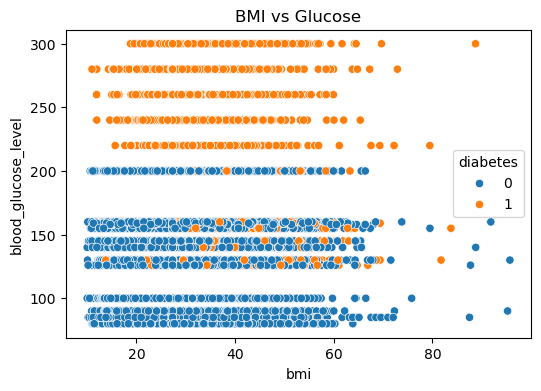

In [19]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="bmi", y="blood_glucose_level", hue="diabetes", data=df)
plt.title("BMI vs Glucose")
plt.show()

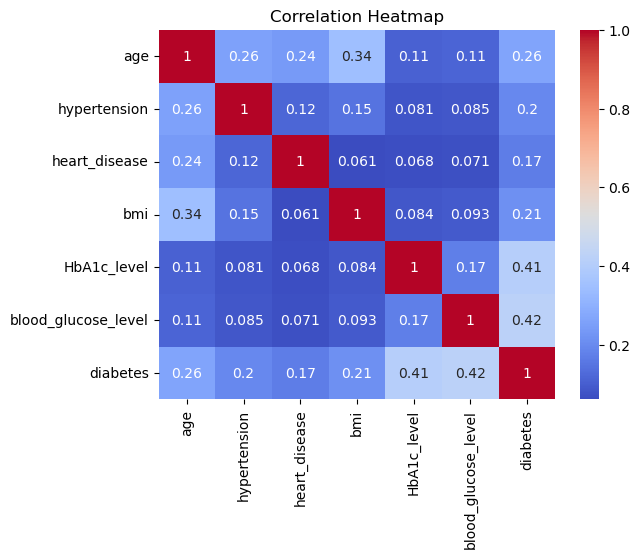

In [20]:
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [21]:
df_encoded = df.copy()
label_cols = ['gender', 'smoking_history']
le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])



In [22]:
X = df_encoded.drop('diabetes', axis=1)
y = df_encoded['diabetes']

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

selected_features = importances.head(5).index.tolist()
print("\nSelected Features:", selected_features)

X_selected = X[selected_features]


HbA1c_level            0.393414
blood_glucose_level    0.321550
bmi                    0.123642
age                    0.102842
smoking_history        0.027707
hypertension           0.015430
heart_disease          0.009188
gender                 0.006227
dtype: float64

Selected Features: ['HbA1c_level', 'blood_glucose_level', 'bmi', 'age', 'smoking_history']


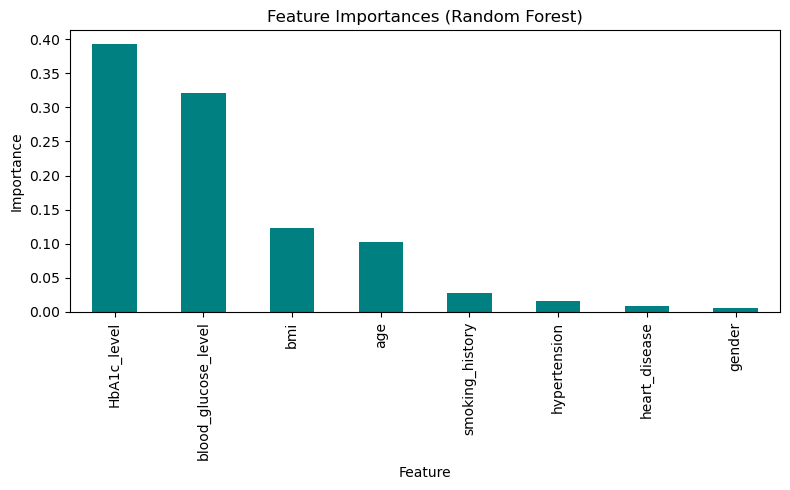

In [23]:
plt.figure(figsize=(8,5))
importances.plot(kind='bar', color='teal')
plt.title("Feature Importances (Random Forest)")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()


In [24]:
X_final = X_selected
y_final = y

X_train, X_temp, y_train, y_temp = train_test_split(
    X_final, y_final,
    test_size=0.3,
    random_state=42,
    stratify=y_final
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (67302, 5)
Validation shape: (14422, 5)
Test shape: (14422, 5)


In [25]:
print("Original:", Counter(y_train))

target_minority = 10000

n_min = sum(y_train == 1)
n_maj = sum(y_train == 0)

max_minority = min(target_minority, n_maj)

sampling_ratio = max_minority / n_maj

sm = SMOTE(sampling_strategy=sampling_ratio, random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Counts after SMOTE:", Counter(y_train_res))
print("Train after SMOTE:", X_train_res.shape)
print("Val:", X_val.shape)
print("Test:", X_test.shape)


Original: Counter({0: 61365, 1: 5937})
Counts after SMOTE: Counter({0: 61365, 1: 10000})
Train after SMOTE: (71365, 5)
Val: (14422, 5)
Test: (14422, 5)


In [26]:
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [27]:
# Model 1: Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_res, y_train_res)

y_val_pred_log = log_model.predict(X_val)

val_acc_log = accuracy_score(y_val, y_val_pred_log)
print("Logistic Regression - Validation Accuracy:", val_acc_log)
print(classification_report(y_val, y_val_pred_log))


Logistic Regression - Validation Accuracy: 0.9505616419359312
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     13149
           1       0.76      0.65      0.70      1273

    accuracy                           0.95     14422
   macro avg       0.86      0.81      0.84     14422
weighted avg       0.95      0.95      0.95     14422



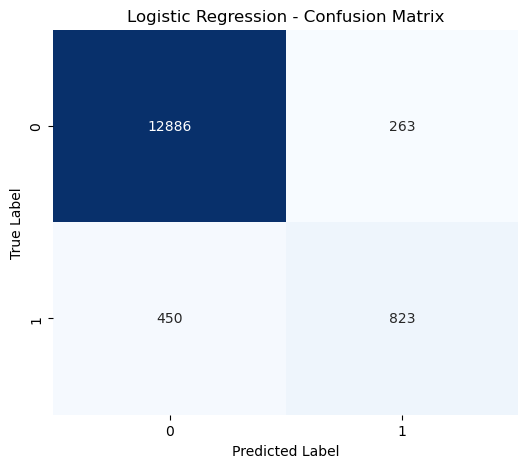

In [28]:
#Confusion Matrix for Logistic Regression - Confusion matrix: shows counts of correct vs incorrect predictions.
cm = confusion_matrix(y_val, y_val_pred_log)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [29]:
#DecisionTree # Model 2
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_res, y_train_res)

y_val_pred_dt = dt_model.predict(X_val)
print("Decision Tree - Validation Accuracy:", accuracy_score(y_val, y_val_pred_dt))
print(classification_report(y_val, y_val_pred_dt))



Decision Tree - Validation Accuracy: 0.9464013312994037
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     13149
           1       0.68      0.74      0.71      1273

    accuracy                           0.95     14422
   macro avg       0.83      0.85      0.84     14422
weighted avg       0.95      0.95      0.95     14422



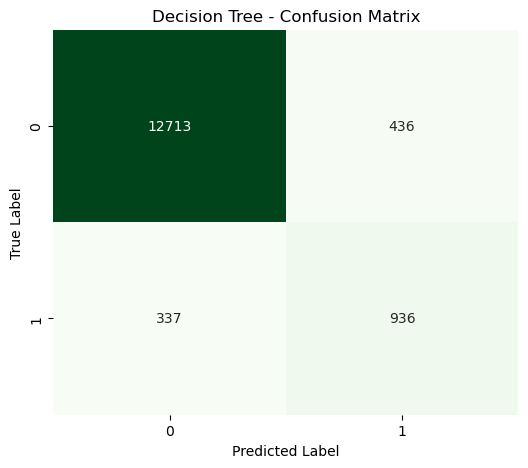

In [30]:
#Confusion Matrix for Decision Tree - Confusion matrix: shows counts of correct vs incorrect predictions.
cm = confusion_matrix(y_val, y_val_pred_dt)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [31]:
#RandomForest # Model 3
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

y_val_pred_rf = rf_model.predict(X_val)
print("Random Forest - Validation Accuracy:", accuracy_score(y_val, y_val_pred_rf))
print(classification_report(y_val, y_val_pred_rf))


Random Forest - Validation Accuracy: 0.9654000832062127
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     13149
           1       0.90      0.68      0.78      1273

    accuracy                           0.97     14422
   macro avg       0.94      0.84      0.88     14422
weighted avg       0.96      0.97      0.96     14422



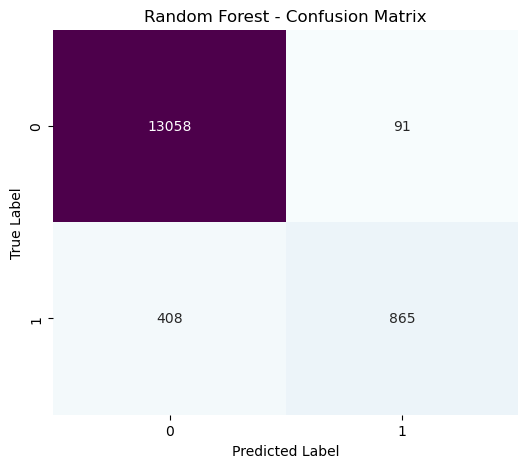

In [32]:
cm = confusion_matrix(y_val, y_val_pred_rf)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [33]:
rf_balanced = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

rf_balanced.fit(X_train_res, y_train_res)

y_val_pred_bal = rf_balanced.predict(X_val)

val_acc_bal = accuracy_score(y_val, y_val_pred_bal)
print("Random Forest (class_weight='balanced') - Validation Accuracy:", val_acc_bal)
print(classification_report(y_val, y_val_pred_bal))


Random Forest (class_weight='balanced') - Validation Accuracy: 0.9647066981001248
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     13149
           1       0.90      0.67      0.77      1273

    accuracy                           0.96     14422
   macro avg       0.94      0.83      0.88     14422
weighted avg       0.96      0.96      0.96     14422



In [34]:
y_val_probs = rf_balanced.predict_proba(X_val)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.01)

best_f1 = 0
best_threshold = 0
f1_scores = []

for thr in thresholds:
    y_val_pred_thr = (y_val_probs >= thr).astype(int)
    f1 = f1_score(y_val, y_val_pred_thr, pos_label=1)
    f1_scores.append(f1)

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = thr

print(f"Best threshold for class 1: {best_threshold}")
print(f"Best F1-score for class 1: {best_f1}")


Best threshold for class 1: 0.8899999999999996
Best F1-score for class 1: 0.7876190476190477


In [35]:
threshold = 0.89
y_val_pred = (y_val_probs >= threshold).astype(int)

val_acc = accuracy_score(y_val, y_val_pred)
print("Random Forest - Validation Accuracy :", val_acc)
print(classification_report(y_val, y_val_pred))

Random Forest - Validation Accuracy : 0.9690750242684787
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     13149
           1       1.00      0.65      0.79      1273

    accuracy                           0.97     14422
   macro avg       0.98      0.82      0.89     14422
weighted avg       0.97      0.97      0.97     14422



In [36]:
X_train_final = np.concatenate([X_train, X_val], axis=0)
y_train_final = np.concatenate([y_train, y_val], axis=0)

In [37]:
rf_final = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
)
rf_final.fit(X_train_final, y_train_final)

RandomForestClassifier(n_estimators=200, random_state=42)

In [38]:
y_test_probs = rf_final.predict_proba(X_test.values)[:, 1]
threshold = 0.89
y_test_pred = (y_test_probs >= threshold).astype(int)


In [39]:
test_acc = accuracy_score(y_test, y_test_pred)
print("Random Forest - Test Accuracy:", test_acc)
print(classification_report(y_test, y_test_pred))

Random Forest - Test Accuracy: 0.9730273193731799
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     13150
           1       1.00      0.69      0.82      1272

    accuracy                           0.97     14422
   macro avg       0.99      0.85      0.90     14422
weighted avg       0.97      0.97      0.97     14422



In [40]:
accuracy  = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, zero_division=0)
recall    = recall_score(y_test, y_test_pred, zero_division=0)
f1        = f1_score(y_test, y_test_pred, zero_division=0)
roc_auc   = roc_auc_score(y_test, y_test_probs)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC-AUC  : {roc_auc:.4f}\n")
print("Classification Report:\n")
print(classification_report(y_test, y_test_pred))

Accuracy : 0.9730
Precision: 1.0000
Recall   : 0.6942
F1-score : 0.8195
ROC-AUC  : 0.9641

Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     13150
           1       1.00      0.69      0.82      1272

    accuracy                           0.97     14422
   macro avg       0.99      0.85      0.90     14422
weighted avg       0.97      0.97      0.97     14422



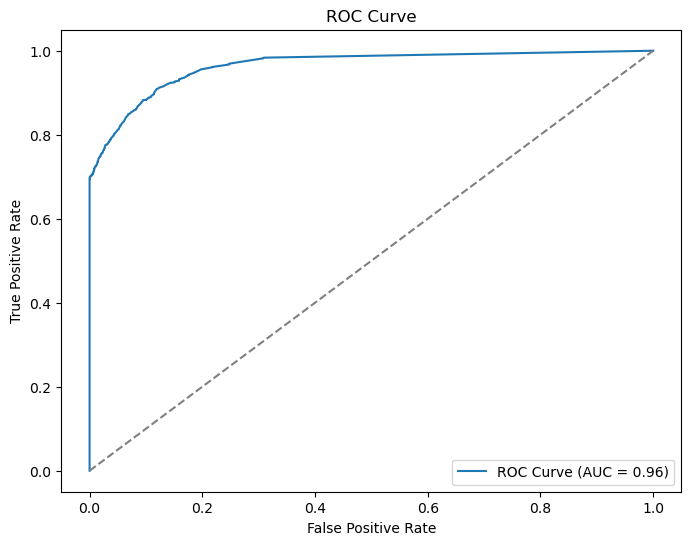

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# make RF single-threaded so Grid/RandomizedSearch can parallelize across jobs
rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=1)

# sample ranges (more efficient than enumerating every value)
param_dist = {
    'n_estimators': randint(50, 401),      # sample between 50 and 400
    'max_depth': randint(8, 25),           # sample depths 8..24
    'min_samples_split': randint(2, 16),   # sample 2..15
    'min_samples_leaf': randint(1, 8),     # sample 1..7
}

rand_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,            # try 30 random combinations (change if you want faster/slower)
    scoring='f1',
    cv=3,                 # fewer folds during tuning (faster)
    n_jobs=-1,            # parallelize across parameter configurations
    random_state=42,
    verbose=2,
    refit=True
)

# fit once (this will refit best estimator on full training set automatically)
rand_search.fit(X_train, y_train)

print("Best params:", rand_search.best_params_)
print("Best F1 Score (CV):", rand_search.best_score_)

best_rf = rand_search.best_estimator_   # already fitted on full training data

y_train_pred = best_rf.predict(X_train)
y_test_pred  = best_rf.predict(X_test)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END max_depth=18, min_samples_leaf=5, min_samples_split=6, n_estimators=152; total time=   5.9s
[CV] END max_depth=18, min_samples_leaf=3, min_samples_split=9, n_estimators=149; total time=   6.1s
[CV] END max_depth=18, min_samples_leaf=5, min_samples_split=6, n_estimators=152; total time=   6.2s
[CV] END max_depth=18, min_samples_leaf=3, min_samples_split=9, n_estimators=149; total time=   6.2s
[CV] END max_depth=18, min_samples_leaf=5, min_samples_split=6, n_estimators=152; total time=   6.4s
[CV] END max_depth=18, min_samples_leaf=3, min_samples_split=9, n_estimators=149; total time=   5.7s
[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=14, n_estimators=320; total time=  12.1s
[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=14, n_estimators=320; total time=  12.0s
[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=14, n_estimators=320; total time=  12.0s
[CV] END max_depth=9, min_s

In [ ]:
print('Train Accuracy : ' , best_rf.score(X_train , y_train))
print('Test Accuracy : ' , best_rf.score(X_test , y_test))

Train Accuracy :  0.9859439541172624
Test Accuracy :  0.957634170018028


In [ ]:
print("Predictions with threshold:", y_val_pred_thr[:10])
print("True labels:", y_test[:10].values)

Predictions with threshold: [0 0 0 0 0 0 1 0 0 0]
True labels: [0 0 0 0 0 0 0 0 0 0]


In [ ]:
print('unique values in y_test : ', np.unique(y_test , return_counts=True))

unique values in y_test :  (array([0, 1]), array([13150,  1272]))


In [ ]:
print(classification_report(y_test, y_val_pred_thr))
print("Final Test Accuracy:", accuracy_score(y_test, y_val_pred_thr))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93     13150
           1       0.09      0.06      0.07      1272

    accuracy                           0.86     14422
   macro avg       0.50      0.50      0.50     14422
weighted avg       0.84      0.86      0.85     14422

Final Test Accuracy: 0.8645818887810289


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_val_pred_thr)
TN, FP, FN, TP = cm.ravel()

print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
print("True Positives:", TP)

classification_error = (FP + FN) / (TP + TN + FP + FN)
print(f"Classification Error: {classification_error:.4f}")

True Negatives: 12396
False Positives: 754
False Negatives: 1199
True Positives: 73
Classification Error: 0.1354


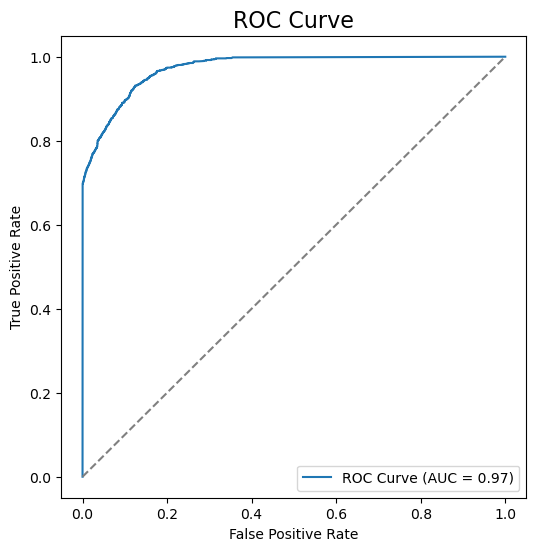

In [ ]:
from sklearn.metrics import roc_curve, auc

y_proba = best_rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve",fontsize =16)
plt.legend()
plt.show()